In [1]:
import keras
keras.__version__

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


import matplotlib.pyplot as plt

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [27]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/paperspace/data/dogscats'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test1')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [9]:
conv_base.trainable = False

In [10]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [7]:
!ls /home/paperspace/data/dogscats

models	sample	test1  tmp  train  valid


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 23000 images belonging to 2 classes.


In [10]:
# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 61s - loss: 0.5642 - acc: 0.6895 - val_loss: 0.3024 - val_acc: 0.8800
Epoch 2/30
 - 55s - loss: 0.3875 - acc: 0.8165 - val_loss: 0.2187 - val_acc: 0.9160
Epoch 3/30
 - 55s - loss: 0.2939 - acc: 0.8785 - val_loss: 0.1703 - val_acc: 0.9360
Epoch 4/30
 - 55s - loss: 0.2381 - acc: 0.8985 - val_loss: 0.1450 - val_acc: 0.9350
Epoch 5/30
 - 55s - loss: 0.2053 - acc: 0.9165 - val_loss: 0.1576 - val_acc: 0.9370
Epoch 6/30
 - 55s - loss: 0.1826 - acc: 0.9255 - val_loss: 0.1465 - val_acc: 0.9400
Epoch 7/30
 - 55s - loss: 0.1896 - acc: 0.9185 - val_loss: 0.1026 - val_acc: 0.9640
Epoch 8/30
 - 55s - loss: 0.1655 - acc: 0.9415 - val_loss: 0.0888 - val_acc: 0.9640
Epoch 9/30
 - 55s - loss: 0.1590 - acc: 0.9355 - val_loss: 0.1159 - val_acc: 0.9560
Epoch 10/30
 - 55s - loss: 0.1618 - acc: 0.9370 - val_loss: 0.0972 - val_acc: 0.9610
Epoch 11/30
 - 55s - loss: 0.1527 - acc: 0.9340 - val_loss: 0.0775 - val_acc: 0.9660
Epoch 12/30
 - 55s - loss: 0.1441 - acc: 0.9415 - val_loss: 0.0831 - val_a

In [13]:
model.save('cats_and_dogs_1.h5')

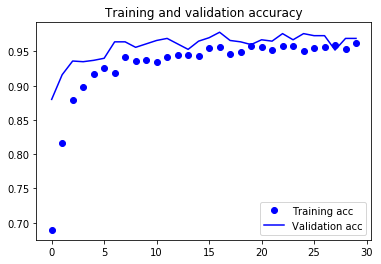

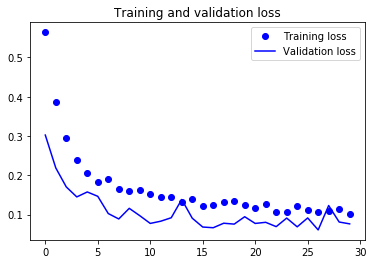

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Fine Tune all layers

f_model = models.Sequential()
f_model.add(conv_base)
f_model.add(layers.Flatten())
f_model.add(layers.Dense(256, activation='relu'))
f_model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
f_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
# define early stopping callback
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]



f_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = f_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 254ms/step - loss: 0.1676 - acc: 0.9405 - val_loss: 0.0715 - val_acc: 0.9630
Epoch 2/100
100/100 [==============================] - 25s 250ms/step - loss: 0.0843 - acc: 0.9685 - val_loss: 0.0710 - val_acc: 0.9770
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.0714 - acc: 0.9725 - val_loss: 0.0787 - val_acc: 0.9650
Epoch 4/100
100/100 [==============================] - 25s 252ms/step - loss: 0.0842 - acc: 0.9745 - val_loss: 0.0455 - val_acc: 0.9820
Epoch 5/100
100/100 [==============================] - 25s 252ms/step - loss: 0.0680 - acc: 0.9770 - val_loss: 0.0576 - val_acc: 0.9730
Epoch 6/100
100/100 [==============================] - 25s 251ms/step - loss: 0.0777 - acc: 0.9690 - val_loss: 0.0735 - val_acc: 0.9750
Epoch 7/100
100/100 [==============================] - 25s 251ms/step - loss: 0.0617 - acc: 0.9785 - val_loss: 0.0594 - val_acc: 0.9790
Epoch 8/100
100/100 [===========================

In [22]:
model.save('cats_and_dogs_finetune.h5')

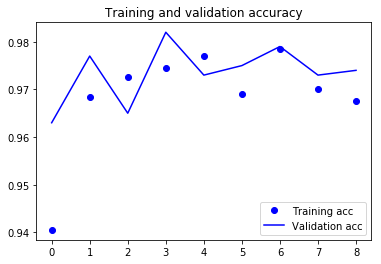

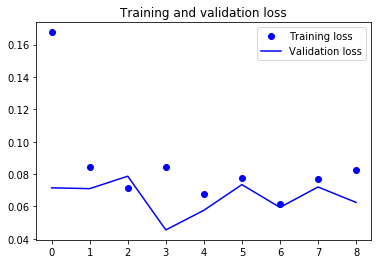

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# predict test classes


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=50,class_mode=None)

# filenames = test_generator.filenames
# nb_samples = len(filenames)

# nb_samples
# predictions=f_model.predict(test_generator,nb_samples)

Found 0 images belonging to 0 classes.


In [29]:

test_images =  [i for i in os.listdir(test_dir)]

ROWS = 150
COLS = 150
CHANNELS = 3

In [31]:
len(test_images)


12500

In [32]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img



def read_image(file_path,dir):
    img = cv2.imread(os.path.join(dir,file_path), cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images,dir):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        x = load_img(os.path.join(dir,test_images[i]), target_size=(150,150))
        x = img_to_array(x)
        x = np.expand_dims(x, axis=0)
#         image = read_image(image_file,dir)
        data[i] = x
        if i%2500 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [33]:
test = prep_data(test_images,test_dir)

Processed 0 of 12500
Processed 2500 of 12500
Processed 5000 of 12500
Processed 7500 of 12500
Processed 10000 of 12500


In [34]:
print("Test shape: {}".format(test.shape))


Test shape: (12500, 150, 150, 3)


In [35]:
preds_class=f_model.predict(test)

In [36]:
preds_class.shape

(12500, 1)

In [45]:
# get the ids
ids = np.array([int(f[:f.find('.')]) for f in test_images])
ids

array([ 9885,  2701, 11231, ...,  3882, 10198,  3901])

0.0

In [41]:
preds=preds_class[:,0]
preds[2]
isdog = preds.clip(min=0.05, max=0.95)

In [42]:
isdog[2]

0.95

In [43]:
input_img=read_image(test_images[2],test_dir)
plt.title('Predicted class')
plt.imshow(input_img)

NameError: name 'cv2' is not defined

In [46]:
# Here we join the two columns into an array of [imageId, isDog]
subm = np.stack([ids,preds], axis=1)
subm[:5]

array([[9.88500000e+03, 1.00000000e+00],
       [2.70100000e+03, 8.72009623e-05],
       [1.12310000e+04, 1.00000000e+00],
       [2.96400000e+03, 1.00000000e+00],
       [1.06510000e+04, 1.00000000e+00]])

In [47]:
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')